In [ ]:
%pip install numpy scikit-learn matplotlib xgboost

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

In [3]:
# Load data
data = fetch_california_housing()
X,y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [4]:
N_Observations, N_features = X.shape
print("# Observations:", N_Observations)
print("# Features:", N_features)

# Observations: 20640
# Features: 8


## Modeling
### Initialize Models
In this step you define the # of base estimators, or individual trees, to be used in each model, and the initialize models for Random Forest Regression adn XGBoost regression.

In [5]:
n_estimators = 100
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

In [ ]:
# Fit models
# training Random Forest
start_t_rf = time.time()
rf.fit(X_train, y_train)
end_t_rf = time.time()
rf_train_time = end_t_rf - start_t_rf

# training XGBoost
start_t_xgb = time.time()
xgb.fit(X_train, y_train)
end_t_xgb = time.time()
xgb_train_time = end_t_xgb - start_t_xgb

In [7]:
# Make predictions
# With random forest
start_t_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_t_rf = time.time()
rf_pred_time = end_t_rf - start_t_rf

# With XGBoost
start_t_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_t_xgb = time.time()
xgb_pred_time = end_t_xgb - start_t_xgb

In [9]:
# Calculate the MSE and R2 values
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [10]:
# Print the results
print("_______Random Forest_________")
print("Training Time: ", rf_train_time)
print("Prediction Time: ", rf_pred_time)
print("MSE:", mse_rf)
print("R2:", r2_rf)

print("_______XGBoost_________")
print("Training Time: ", xgb_train_time)
print("Prediction Time: ", xgb_pred_time)
print("MSE:", mse_xgb)
print("R2:", r2_xgb)


_______Random Forest_________
Training Time:  8.141852140426636
Prediction Time:  0.09419870376586914
MSE: 0.2553684927247781
R2: 0.8051230593157366
_______XGBoost_________
Training Time:  0.3130912780761719
Prediction Time:  0.0024597644805908203
MSE: 0.2225899267544737
R2: 0.8301370561019205


The MSE and R2 values of XGBoost is better than Random Forest, but the differences aren't overwhelming <br/>
The difference in computation time between XGBoost and Random Forest are the strongest point

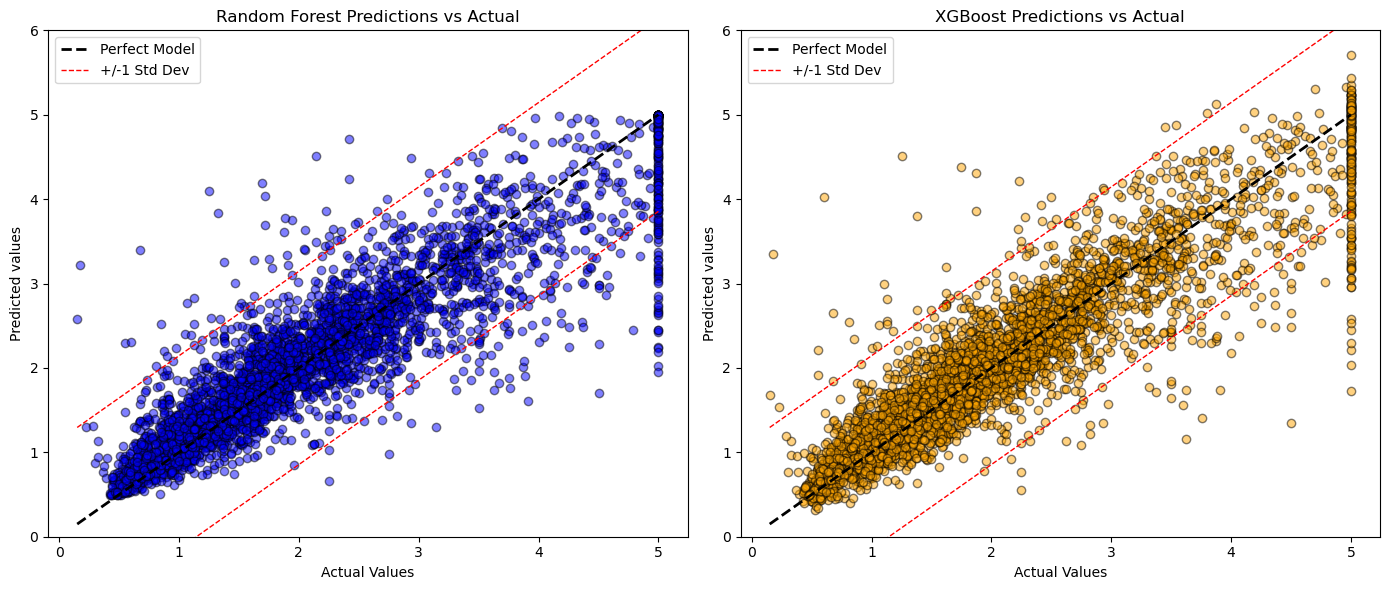

In [27]:
# Visualize
std_y = np.std(y_test)

plt.figure(figsize=(14,6))

# Random Forest plot
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue", ec="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2, label="Perfect Model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y , y_test.max() + std_y], "r--", lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y , y_test.max() - std_y], "r--", lw=1)
plt.ylim(0,6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.legend()


# XGBoost plot
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="orange", ec="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2, label="Perfect Model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y , y_test.max() + std_y], "r--", lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y , y_test.max() - std_y], "r--", lw=1)
plt.ylim(0,6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.legend()
plt.tight_layout()

plt.show()

Both models performed very well. Most of their predictions fall within a standard deviation of the target.
Random forest "respects" the upper bound (max value) present in the target by staying within its limits, while XGBoost "overshoots" or exceeds this limit